# Hypothesis Testing

For this assignment, I will be working with the [US Health Insurance Dataset](https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv) from [Kaggle](https://www.kaggle.com/teertha/ushealthinsurancedataset).

Use the hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import stats

In [2]:
! pip install pandas

In [3]:
data = 'Data/insurance - insurance.csv'
df = pd.read_csv(data)
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## 1. Do smokers have higher insurance charges than non-smokers?

### 1. State Null Hypothesis and Alternative Hypothesis

- $H_0$ (Null Hypothesis):There is no difference between insurance charges for smokers and non-smokers.
- $H_A$ (Alternative Hypothesis): There is a significant difference between insurance charges for snmokers and non-smokers.

### 2. Select the correct test according to the data type and number of samples

- Type of data: Numeric
- How many groups/samples?: 2 Groups/samples
- What is the appropriate test?: 2 sample T-Test

In [5]:
## check the col that contains the measurement: 'charges'
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [6]:
## check the col that contains info on 'smoker'
df['smoker'].describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [7]:
## create a column that easily separates our groups: 'smoker_yes'
df['smoker_yes'] = df['smoker'].str.contains('yes')
df['smoker_yes'].value_counts()

False    1064
True      274
Name: smoker_yes, dtype: int64

In [9]:
## save list of columns needed for each group
needed_cols = ['smoker_yes','charges']

df[needed_cols]

,smoker_yes,charges
0,True,16884.92400
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
...,...,...
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350
1336,False,2007.94500


In [10]:
## save male team in separate variable
non_smoker_df = df.loc[ df['smoker_yes']== False, needed_cols]
non_smoker_df

,smoker_yes,charges
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
5,False,3756.62160
...,...,...
1332,False,11411.68500
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350


In [11]:
## save male team in separate variable
smoker_df = df.loc[ df['smoker_yes']== True, needed_cols]
smoker_df

,smoker_yes,charges
0,True,16884.92400
11,True,27808.72510
14,True,39611.75770
19,True,36837.46700
23,True,37701.87680
...,...,...
1313,True,36397.57600
1314,True,18765.87545
1321,True,28101.33305
1323,True,43896.37630


In [12]:
## Make a df just for visualization by concat the groups 
plot_df = pd.concat([smoker_df,non_smoker_df])
plot_df

,smoker_yes,charges
0,True,16884.9240
11,True,27808.7251
14,True,39611.7577
19,True,36837.4670
23,True,37701.8768
...,...,...
1332,False,11411.6850
1333,False,10600.5483
1334,False,2205.9808
1335,False,1629.8335


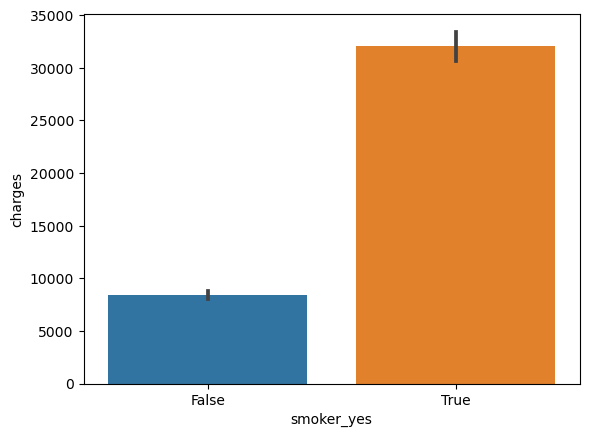

In [13]:
## visualize the group means
sns.barplot(data=plot_df, x='smoker_yes',y='charges')
plt.savefig('Data/smoker_charges.png')

![Smoker v/s Insurance Charges](Data/smoker_charges.png)

### 3. Test the assumptions of your selected test.
- No significant outliers
- Normality
- Equal Variance


#### Assumption: No significant outliers

In [14]:
# Checking Assumption of No Significant Outliers
## Saving JUST the numeric col as final group variables
smoker_group = smoker_df['charges']
non_smoker_group = non_smoker_df['charges']
smoker_group


0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [15]:
## Check smoker group for outliers
smoker_outliers = np.abs(stats.zscore(smoker_group)) > 3
print(f'There are {smoker_outliers.sum()} outlier in the smokers group.')

There are 0 outlier in the smokers group.


In [16]:
## Check non_smoker group for outliers
non_smoker_outliers = np.abs(stats.zscore(non_smoker_group)) > 3
print(f'There are {non_smoker_outliers.sum()} outlier in the non-smokers group.')

There are 24 outlier in the non-smokers group.


##### Removing outliers

In [17]:
## remove outliers from non_smoker_group
non_smoker_group = non_smoker_group.loc[~non_smoker_outliers]
non_smoker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

#### Assumption: Normally Distributed Groups

In [18]:
## Check smoker group for normality
result = stats.normaltest(smoker_group)
result.pvalue


5.564930630036463e-14

In [19]:
## Check n for smoker group
len(smoker_group)

274

In [20]:
## Check non-smoker group for normality
result = stats.normaltest(non_smoker_group)
result.pvalue


2.6945416315543976e-36

In [21]:
## Check n for non-smoker group
len(non_smoker_group)

1040

- Did we meet the assumption of normality?
    - We have large enough groups that we can safely disregard the assumption of normality.



#### Assumption: Equal Variance

In [28]:
## use Levene's test to check if groups have equal variance
rseult = stats.levene(smoker_group, non_smoker_group)
print(result)

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)


In [29]:
## Use an if-else to help interpret the p-value
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


- Did we meet the assumption of equal variance?
    - We met the assumption of normality but did NOT meet the assumption of equal variance.
    - We will therefore run a Welch's t-test instead by adding equal_var=False to stats.ttest_ind



### 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [31]:
result = stats.ttest_ind(smoker_group, non_smoker_group, equal_var=False)
print(result)
result.pvalue  < .05

Ttest_indResult(statistic=33.732305987092516, pvalue=2.5753226625873578e-104)


True

In [32]:
smoker_group.mean()

32050.23183153284

In [33]:
non_smoker_group.mean()

7939.8608446721155

### 5. Interpret your p-value and reject or fail to reject your null hypothesis 

- We had a p-value < .05 for our welch's t-test. We reject the null hypothesis and support the alternative that smokers pay higher insurance charges.

### 6. Show a supporting visualization that helps display the result

<Axes: xlabel='smoker', ylabel='charges'>

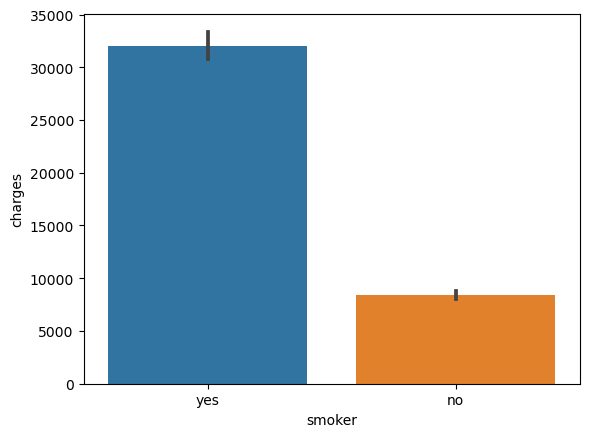

In [35]:
## Add a summary visual to support our results.
sns.barplot(data=df, x='smoker',y='charges')

## 2. Are men more likely to smoke than women?

### 1. State Null Hypothesis and Alternative Hypothesis

- $H_0$ (Null Hypothesis): There is no differnce between gender and the likeliness to smoke.
- $H_A$ (Alternative Hypothesis): There is a significant difference between gender and the likeliness to smoke.

### 2. Select the correct test according to the data type and number of samples

- Type of data: Categorical
- How many groups/samples?: 2 Groups/samples
- What is the appropriate test?: Chi-Square

#### Visualize and separate data for hypothesis
- What column is our target?
    - smoker
- What column determines our groups?
    - sex

In [36]:
df['smoker'].describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [37]:
df['sex'].describe()

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

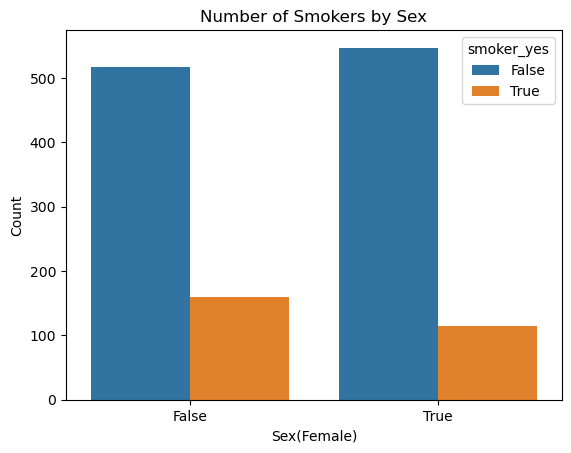

In [59]:
## visualize the group means
ax = sns.countplot(data=plot_df, x='female', hue='smoker_yes')
ax.set_title('Number of Smokers by Sex')
ax.set_xlabel('Sex(Female)')
ax.set_ylabel('Count');

### 3. Test the assumptions of your selected test.
- No significant outliers
- Normality
- Equal Variance


#### Assumption: No Significant Outliers

In [62]:
# Checking Assumption of No Significant Outliers
## Saving JUST the numeric col as final group variables
female_group = female_df['smoker_yes']
male_group = male_df['smoker_yes']
female_group

0        True
5       False
6       False
7       False
9       False
        ...  
1332    False
1334    False
1335    False
1336    False
1337     True
Name: smoker_yes, Length: 662, dtype: bool

In [63]:
## Check female group for outliers
female_outliers = np.abs(stats.zscore(female_group)) > 3
female_outliers.sum()

0

In [64]:
## Check male group for outliers
male_outliers = np.abs(stats.zscore(male_group)) > 3
male_outliers.sum()

0

- No outliers. Assumption met!

#### Assumption: Normally Distributed Groups

In [70]:
#Using normaltest to check if female_group is normally distributes
result = stats.normaltest(female_group)
result.pvalue

1.5451615879700298e-40

In [71]:
len(female_group)

662

In [69]:
#Using normaltest to check if male_group is normally distributes
result = stats.normaltest(male_group)
result.pvalue

2.9790348129116147e-27

In [72]:
len(male_group)

676

- We have large enough groups that we can safely disregard the assumption of normality.

#### Assumption: Equal Variance

In [73]:
## Use Levene's test for equal variance
result = stats.levene(male_group, female_group)
print(result)


LeveneResult(statistic=7.799582538314033, pvalue=0.005300369127378653)


In [74]:
## Use an if-else to help interpret the p-value
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


#### ??? Do we use chi square method here???

### 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [77]:
results = stats.chi2_contingency(male_group, female_group)

TypeError: chi2_contingency() got an unexpected keyword argument 'equal_var'

### 5. Interpret your p-value and reject or fail to reject your null hypothesis 

### 6. Show a supporting visualization that helps display the result

## 3. Do different regions have different charges, on average?

### 1. State Null Hypothesis and Alternative Hypothesis

- $H_0$ (Null Hypothesis): There is no difference based on regions and charges
- $H_A$ (Alternative Hypothesis): There is a significant difference based on region and charges

### 2. Select the correct test according to the data type and number of samples

### 3. Test the assumptions of your selected test.

### 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)

### 5. Interpret your p-value and reject or fail to reject your null hypothesis 

### 6. Show a supporting visualization that helps display the result